# Ratul Chakraborty
# BDA 2nd Sem

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
#     Features:(n_examples, n_features)
#     Labels: (n_examples, 1)
#     Weights:(n_features, 1)


# -- Sigmoid function -- #
def sigmoid(z):
    " Return the sigmoid function "
    return 1/(1 + np.exp(-z))

# -- Predictor function -- #
def predict(features, weights):
    '''
    Returns probabilities
    of class label
    '''
    z = np.dot(features, weights)
    return sigmoid(z)

# -- Cost function -- #
def cost_function(features, labels, weights):
    '''    
    Write down the average cross-entropy loss
    '''
    observations = len(labels)

    predictions = predict(features, weights)

    # You may use this format or define in your own way
    # Note: This is for binary cros-entropy loss.
    
    # We can divide the binary cross entropy loss into two parts
    # One for p(y=1) and another for p(y=0)

    # Take the error when label=1
    class1_cost = np.dot(labels, np.log(predictions))

    # Take the error when label=0
    class2_cost = np.dot((1 - labels), np.log(1-predictions))

    # Take the sum of both costs
    cost = class1_cost + class2_cost

    # Take the average cost
    cost = -(cost/observations)

    return cost


def update_weights(features, labels, weights, lr):
    '''
   Gradient Descent
    '''
    N = features.shape[1]

    #1 - Get Predictions
    predictions = predict(features, weights)

    gradient = np.dot((predictions - labels), features)

    # 3 Take the average cost derivative for each feature
    gradient /= N

    # 4 Update the weights using the learning rate lr
    weights = weights - lr*gradient

    return weights

def decision_boundary(prob):
    return 1 if prob >= .5 else 0 # You may change the threshold from 0.5 

def train(features, labels, weights, lr, iters):
    cost_history = [np.float64('inf')]

    for i in range(iters):
        weights = update_weights(features, labels, weights, lr)

        #Calculate error for auditing purposes
        cost = cost_function(features, labels, weights)
        
        cost_history.append(cost)

        print("iter: "+str(i) + " cost: "+str(cost))

    return weights, cost_history

def accuracy(predicted_labels, actual_labels):
    diff = predicted_labels - actual_labels
    return 1.0 - (float(np.count_nonzero(diff)) / len(diff))

def normalize(x):
    return (x - np.mean(x))/np.std(x)

In [3]:
data = pd.read_excel("ENB2012_data.xlsx")
data.drop(["Unnamed: 10", "Unnamed: 11"], axis = 1, inplace=True)
data

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [4]:
data = data.sort_values("X8")

In [5]:
X = data.drop("X8", axis = 1)
y = data.iloc[:, 7]

In [6]:
X = X.apply(normalize, axis = 1)

In [7]:
# Train Test Split
x_train, x_test,y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
labels = ([], [])
k = -1
for j in [y_train, y_test]:
    k += 1
    for i in np.unique(j) :
        temp = np.zeros(len(j))
        temp[np.where(j == i)] = 1
        labels[k].append(temp)
train_labels, test_labels = labels

In [9]:
weights = []
losses = []
for k in train_labels :
    # Initialize the weights
    wts = np.random.chisquare( 1, x_train.shape[1])
    # Training
    optimal_wts, loss = train(x_train, k, wts, 1e-4, 1000)
    weights.append(optimal_wts)
    losses.append(loss)
    

iter: 0 cost: 0.39457771245914736
iter: 1 cost: 0.39433767581729934
iter: 2 cost: 0.3940977079089547
iter: 3 cost: 0.39385780897606504
iter: 4 cost: 0.39361797926131464
iter: 5 cost: 0.39337821900812214
iter: 6 cost: 0.39313852846064185
iter: 7 cost: 0.3928989078637646
iter: 8 cost: 0.3926593574631198
iter: 9 cost: 0.3924198775050759
iter: 10 cost: 0.39218046823674246
iter: 11 cost: 0.39194112990597074
iter: 12 cost: 0.3917018627613553
iter: 13 cost: 0.3914626670522356
iter: 14 cost: 0.39122354302869633
iter: 15 cost: 0.3909844909415697
iter: 16 cost: 0.39074551104243593
iter: 17 cost: 0.39050660358362504
iter: 18 cost: 0.3902677688182176
iter: 19 cost: 0.39002900700004656
iter: 20 cost: 0.3897903183836976
iter: 21 cost: 0.3895517032245113
iter: 22 cost: 0.3893131617785837
iter: 23 cost: 0.3890746943027679
iter: 24 cost: 0.38883630105467476
iter: 25 cost: 0.3885979822926747
iter: 26 cost: 0.3883597382758986
iter: 27 cost: 0.38812156926423874
iter: 28 cost: 0.38788347551835034
iter: 29 

iter: 334 cost: 0.320115924636098
iter: 335 cost: 0.31991711293080666
iter: 336 cost: 0.3197184933374798
iter: 337 cost: 0.3195200663264694
iter: 338 cost: 0.3193218323682788
iter: 339 cost: 0.31912379193355445
iter: 340 cost: 0.31892594549307923
iter: 341 cost: 0.31872829351776427
iter: 342 cost: 0.31853083647864217
iter: 343 cost: 0.31833357484685887
iter: 344 cost: 0.31813650909366614
iter: 345 cost: 0.3179396396904144
iter: 346 cost: 0.3177429671085442
iter: 347 cost: 0.31754649181957945
iter: 348 cost: 0.3173502142951187
iter: 349 cost: 0.31715413500682804
iter: 350 cost: 0.3169582544264329
iter: 351 cost: 0.31676257302570976
iter: 352 cost: 0.3165670912764792
iter: 353 cost: 0.3163718096505968
iter: 354 cost: 0.3161767286199459
iter: 355 cost: 0.31598184865642875
iter: 356 cost: 0.3157871702319592
iter: 357 cost: 0.3155926938184538
iter: 358 cost: 0.3153984198878239
iter: 359 cost: 0.31520434891196747
iter: 360 cost: 0.31501048136276044
iter: 361 cost: 0.3148168177120485
iter: 36

iter: 653 cost: 0.268772435114962
iter: 654 cost: 0.2686554639980673
iter: 655 cost: 0.2685387890194438
iter: 656 cost: 0.268422410177753
iter: 657 cost: 0.2683063274686915
iter: 658 cost: 0.2681905408849873
iter: 659 cost: 0.26807505041639657
iter: 660 cost: 0.2679598560497014
iter: 661 cost: 0.26784495776870637
iter: 662 cost: 0.26773035555423624
iter: 663 cost: 0.2676160493841332
iter: 664 cost: 0.2675020392332544
iter: 665 cost: 0.2673883250734696
iter: 666 cost: 0.267274906873659
iter: 667 cost: 0.26716178459971096
iter: 668 cost: 0.26704895821451996
iter: 669 cost: 0.26693642767798476
iter: 670 cost: 0.26682419294700666
iter: 671 cost: 0.2667122539754873
iter: 672 cost: 0.26660061071432783
iter: 673 cost: 0.2664892631114269
iter: 674 cost: 0.2663782111116793
iter: 675 cost: 0.266267454656975
iter: 676 cost: 0.2661569936861976
iter: 677 cost: 0.2660468281352239
iter: 678 cost: 0.26593695793692196
iter: 679 cost: 0.26582738302115155
iter: 680 cost: 0.26571810331476253
iter: 681 cos

iter: 116 cost: 0.5464184191496586
iter: 117 cost: 0.5448014139339336
iter: 118 cost: 0.5432283072901103
iter: 119 cost: 0.5416977796289699
iter: 120 cost: 0.5402085544261148
iter: 121 cost: 0.5387593967606003
iter: 122 cost: 0.5373491119007873
iter: 123 cost: 0.5359765439363198
iter: 124 cost: 0.5346405744551034
iter: 125 cost: 0.5333401212641518
iter: 126 cost: 0.5320741371531537
iter: 127 cost: 0.5308416086996034
iter: 128 cost: 0.5296415551143471
iter: 129 cost: 0.528473027126388
iter: 130 cost: 0.5273351059058111
iter: 131 cost: 0.5262269020236914
iter: 132 cost: 0.5251475544478637
iter: 133 cost: 0.524096229573452
iter: 134 cost: 0.5230721202870643
iter: 135 cost: 0.5220744450635866
iter: 136 cost: 0.5211024470945254
iter: 137 cost: 0.5201553934468689
iter: 138 cost: 0.5192325742514654
iter: 139 cost: 0.5183333019199298
iter: 140 cost: 0.517456910389127
iter: 141 cost: 0.5166027543922921
iter: 142 cost: 0.515770208755881
iter: 143 cost: 0.5149586677212641
iter: 144 cost: 0.514167

iter: 362 cost: 0.4808136492894789
iter: 363 cost: 0.4808056467400348
iter: 364 cost: 0.48079778850502275
iter: 365 cost: 0.4807900717950552
iter: 366 cost: 0.48078249387628685
iter: 367 cost: 0.48077505206926574
iter: 368 cost: 0.48076774374780495
iter: 369 cost: 0.4807605663378829
iter: 370 cost: 0.48075351731656557
iter: 371 cost: 0.4807465942109523
iter: 372 cost: 0.4807397945971449
iter: 373 cost: 0.48073311609923886
iter: 374 cost: 0.48072655638833633
iter: 375 cost: 0.4807201131815809
iter: 376 cost: 0.48071378424121186
iter: 377 cost: 0.480707567373641
iter: 378 cost: 0.48070146042854717
iter: 379 cost: 0.48069546129799146
iter: 380 cost: 0.48068956791555134
iter: 381 cost: 0.4806837782554723
iter: 382 cost: 0.48067809033183984
iter: 383 cost: 0.480672502197766
iter: 384 cost: 0.4806670119445968
iter: 385 cost: 0.48066161770113336
iter: 386 cost: 0.4806563176328716
iter: 387 cost: 0.4806511099412579
iter: 388 cost: 0.48064599286295945
iter: 389 cost: 0.48064096466915146
iter: 3

iter: 797 cost: 0.4802436617218011
iter: 798 cost: 0.4802432992804542
iter: 799 cost: 0.48024293693982395
iter: 800 cost: 0.4802425746990962
iter: 801 cost: 0.48024221255747096
iter: 802 cost: 0.48024185051416274
iter: 803 cost: 0.4802414885684002
iter: 804 cost: 0.4802411267194259
iter: 805 cost: 0.4802407649664959
iter: 806 cost: 0.4802404033088796
iter: 807 cost: 0.48024004174585955
iter: 808 cost: 0.4802396802767311
iter: 809 cost: 0.4802393189008024
iter: 810 cost: 0.48023895761739355
iter: 811 cost: 0.48023859642583766
iter: 812 cost: 0.480238235325479
iter: 813 cost: 0.48023787431567383
iter: 814 cost: 0.48023751339579024
iter: 815 cost: 0.48023715256520727
iter: 816 cost: 0.4802367918233152
iter: 817 cost: 0.4802364311695152
iter: 818 cost: 0.4802360706032192
iter: 819 cost: 0.4802357101238495
iter: 820 cost: 0.48023534973083915
iter: 821 cost: 0.48023498942363085
iter: 822 cost: 0.48023462920167725
iter: 823 cost: 0.4802342690644413
iter: 824 cost: 0.48023390901139507
iter: 82

iter: 196 cost: 0.4941218910033827
iter: 197 cost: 0.49357818373561574
iter: 198 cost: 0.49304752578396766
iter: 199 cost: 0.4925295711109847
iter: 200 cost: 0.49202398386754664
iter: 201 cost: 0.49153043806218016
iter: 202 cost: 0.49104861724198967
iter: 203 cost: 0.4905782141847771
iter: 204 cost: 0.49011893060193745
iter: 205 cost: 0.48967047685173065
iter: 206 cost: 0.48923257166254924
iter: 207 cost: 0.4888049418658098
iter: 208 cost: 0.4883873221381157
iter: 209 cost: 0.4879794547523483
iter: 210 cost: 0.48758108933735933
iter: 211 cost: 0.4871919826459457
iter: 212 cost: 0.4868118983308061
iter: 213 cost: 0.48644060672818246
iter: 214 cost: 0.4860778846489082
iter: 215 cost: 0.48572351517659096
iter: 216 cost: 0.48537728747266723
iter: 217 cost: 0.485038996588083
iter: 218 cost: 0.48470844328135326
iter: 219 cost: 0.4843854338427721
iter: 220 cost: 0.4840697799245507
iter: 221 cost: 0.4837612983766645
iter: 222 cost: 0.4834598110882066
iter: 223 cost: 0.48316514483404843
iter: 2

iter: 431 cost: 0.4696970948033151
iter: 432 cost: 0.46969261322859557
iter: 433 cost: 0.4696882138613228
iter: 434 cost: 0.46968389515783315
iter: 435 cost: 0.4696796556041595
iter: 436 cost: 0.4696754937154406
iter: 437 cost: 0.4696714080353427
iter: 438 cost: 0.46966739713549316
iter: 439 cost: 0.46966345961492556
iter: 440 cost: 0.4696595940995369
iter: 441 cost: 0.4696557992415553
iter: 442 cost: 0.4696520737190197
iter: 443 cost: 0.4696484162352689
iter: 444 cost: 0.4696448255184422
iter: 445 cost: 0.46964130032099016
iter: 446 cost: 0.4696378394191955
iter: 447 cost: 0.469634441612703
iter: 448 cost: 0.46963110572406014
iter: 449 cost: 0.4696278305982669
iter: 450 cost: 0.46962461510233394
iter: 451 cost: 0.4696214581248512
iter: 452 cost: 0.46961835857556367
iter: 453 cost: 0.46961531538495804
iter: 454 cost: 0.4696123275038553
iter: 455 cost: 0.469609393903013
iter: 456 cost: 0.46960651357273625
iter: 457 cost: 0.46960368552249454
iter: 458 cost: 0.46960090878054866
iter: 459 

iter: 888 cost: 0.4694402629084619
iter: 889 cost: 0.4694402344971543
iter: 890 cost: 0.4694402061099818
iter: 891 cost: 0.4694401777465872
iter: 892 cost: 0.46944014940662
iter: 893 cost: 0.46944012108973526
iter: 894 cost: 0.4694400927955948
iter: 895 cost: 0.46944006452386605
iter: 896 cost: 0.4694400362742226
iter: 897 cost: 0.4694400080463438
iter: 898 cost: 0.46943997983991453
iter: 899 cost: 0.4694399516546255
iter: 900 cost: 0.4694399234901729
iter: 901 cost: 0.46943989534625824
iter: 902 cost: 0.4694398672225884
iter: 903 cost: 0.46943983911887543
iter: 904 cost: 0.46943981103483656
iter: 905 cost: 0.46943978297019395
iter: 906 cost: 0.4694397549246748
iter: 907 cost: 0.4694397268980112
iter: 908 cost: 0.46943969888993997
iter: 909 cost: 0.4694396709002025
iter: 910 cost: 0.4694396429285448
iter: 911 cost: 0.4694396149747176
iter: 912 cost: 0.469439587038476
iter: 913 cost: 0.469439559119579
iter: 914 cost: 0.46943953121779075
iter: 915 cost: 0.4694395033328788
iter: 916 cost:

iter: 180 cost: 0.5647019276146947
iter: 181 cost: 0.5638790588120443
iter: 182 cost: 0.5630634831778788
iter: 183 cost: 0.5622551788750979
iter: 184 cost: 0.5614541235032838
iter: 185 cost: 0.5606602941043656
iter: 186 cost: 0.5598736671684503
iter: 187 cost: 0.559094218639818
iter: 188 cost: 0.5583219239230774
iter: 189 cost: 0.557556757889479
iter: 190 cost: 0.5567986948833807
iter: 191 cost: 0.5560477087288658
iter: 192 cost: 0.5553037727365046
iter: 193 cost: 0.5545668597102612
iter: 194 cost: 0.5538369419545387
iter: 195 cost: 0.5531139912813584
iter: 196 cost: 0.5523979790176712
iter: 197 cost: 0.5516888760127961
iter: 198 cost: 0.5509866526459819
iter: 199 cost: 0.5502912788340858
iter: 200 cost: 0.54960272403937
iter: 201 cost: 0.5489209572774061
iter: 202 cost: 0.5482459471250862
iter: 203 cost: 0.5475776617287368
iter: 204 cost: 0.5469160688123288
iter: 205 cost: 0.5462611356857804
iter: 206 cost: 0.5456128292533498
iter: 207 cost: 0.54497111602211
iter: 208 cost: 0.54433596

iter: 476 cost: 0.49683612252470705
iter: 477 cost: 0.49682543694170944
iter: 478 cost: 0.49681493756383627
iter: 479 cost: 0.496804621125188
iter: 480 cost: 0.49679448441468316
iter: 481 cost: 0.49678452427520553
iter: 482 cost: 0.49677473760276347
iter: 483 cost: 0.49676512134565975
iter: 484 cost: 0.4967556725036729
iter: 485 cost: 0.49674638812724997
iter: 486 cost: 0.4967372653167098
iter: 487 cost: 0.4967283012214577
iter: 488 cost: 0.49671949303921026
iter: 489 cost: 0.4967108380152315
iter: 490 cost: 0.4967023334415796
iter: 491 cost: 0.49669397665636306
iter: 492 cost: 0.49668576504300876
iter: 493 cost: 0.4966776960295396
iter: 494 cost: 0.49666976708786176
iter: 495 cost: 0.49666197573306264
iter: 496 cost: 0.4966543195227193
iter: 497 cost: 0.4966467960562155
iter: 498 cost: 0.49663940297406906
iter: 499 cost: 0.49663213795726907
iter: 500 cost: 0.4966249987266227
iter: 501 cost: 0.4966179830421108
iter: 502 cost: 0.49661108870225346
iter: 503 cost: 0.49660431354348433
iter

iter: 895 cost: 0.49612693779322037
iter: 896 cost: 0.4961265955994129
iter: 897 cost: 0.4961262535328135
iter: 898 cost: 0.49612591159208164
iter: 899 cost: 0.4961255697759025
iter: 900 cost: 0.4961252280829858
iter: 901 cost: 0.4961248865120657
iter: 902 cost: 0.49612454506190007
iter: 903 cost: 0.4961242037312699
iter: 904 cost: 0.4961238625189798
iter: 905 cost: 0.4961235214238561
iter: 906 cost: 0.4961231804447478
iter: 907 cost: 0.49612283958052505
iter: 908 cost: 0.4961224988300797
iter: 909 cost: 0.49612215819232414
iter: 910 cost: 0.49612181766619134
iter: 911 cost: 0.49612147725063416
iter: 912 cost: 0.49612113694462545
iter: 913 cost: 0.49612079674715703
iter: 914 cost: 0.4961204566572397
iter: 915 cost: 0.49612011667390327
iter: 916 cost: 0.49611977679619523
iter: 917 cost: 0.4961194370231811
iter: 918 cost: 0.49611909735394416
iter: 919 cost: 0.4961187577875845
iter: 920 cost: 0.49611841832321973
iter: 921 cost: 0.4961180789599833
iter: 922 cost: 0.4961177396970253
iter: 9

iter: 223 cost: 0.4779687996644845
iter: 224 cost: 0.4779636831115307
iter: 225 cost: 0.4779586622585907
iter: 226 cost: 0.4779537352712207
iter: 227 cost: 0.4779489003510236
iter: 228 cost: 0.4779441557349147
iter: 229 cost: 0.4779394996944055
iter: 230 cost: 0.4779349305349008
iter: 231 cost: 0.4779304465950124
iter: 232 cost: 0.4779260462458855
iter: 233 cost: 0.477921727890542
iter: 234 cost: 0.4779174899632342
iter: 235 cost: 0.4779133309288153
iter: 236 cost: 0.47790924928212114
iter: 237 cost: 0.47790524354736647
iter: 238 cost: 0.4779013122775522
iter: 239 cost: 0.47789745405388695
iter: 240 cost: 0.47789366748521916
iter: 241 cost: 0.47788995120748207
iter: 242 cost: 0.4778863038831499
iter: 243 cost: 0.47788272420070593
iter: 244 cost: 0.4778792108741207
iter: 245 cost: 0.4778757626423424
iter: 246 cost: 0.477872378268796
iter: 247 cost: 0.47786905654089556
iter: 248 cost: 0.4778657962695637
iter: 249 cost: 0.4778625962887634
iter: 250 cost: 0.47785945545503783
iter: 251 cost

iter: 514 cost: 0.47768663525128674
iter: 515 cost: 0.47768657693153377
iter: 516 cost: 0.4776865190339054
iter: 517 cost: 0.47768646155080957
iter: 518 cost: 0.4776864044747929
iter: 519 cost: 0.47768634779853797
iter: 520 cost: 0.477686291514861
iter: 521 cost: 0.4776862356167092
iter: 522 cost: 0.4776861800971589
iter: 523 cost: 0.47768612494941265
iter: 524 cost: 0.47768607016679704
iter: 525 cost: 0.4776860157427604
iter: 526 cost: 0.4776859616708709
iter: 527 cost: 0.47768590794481375
iter: 528 cost: 0.47768585455838997
iter: 529 cost: 0.4776858015055131
iter: 530 cost: 0.47768574878020803
iter: 531 cost: 0.47768569637660885
iter: 532 cost: 0.4776856442889564
iter: 533 cost: 0.4776855925115966
iter: 534 cost: 0.477685541038979
iter: 535 cost: 0.4776854898656537
iter: 536 cost: 0.47768543898627086
iter: 537 cost: 0.4776853883955779
iter: 538 cost: 0.47768533808841807
iter: 539 cost: 0.47768528805972893
iter: 540 cost: 0.47768523830454007
iter: 541 cost: 0.477685188817972
iter: 542

iter: 894 cost: 0.47767231084151995
iter: 895 cost: 0.477672277470749
iter: 896 cost: 0.4776722441057208
iter: 897 cost: 0.4776722107464273
iter: 898 cost: 0.4776721773928607
iter: 899 cost: 0.4776721440450134
iter: 900 cost: 0.4776721107028777
iter: 901 cost: 0.47767207736644607
iter: 902 cost: 0.4776720440357114
iter: 903 cost: 0.47767201071066623
iter: 904 cost: 0.4776719773913037
iter: 905 cost: 0.4776719440776166
iter: 906 cost: 0.47767191076959814
iter: 907 cost: 0.4776718774672415
iter: 908 cost: 0.4776718441705403
iter: 909 cost: 0.4776718108794875
iter: 910 cost: 0.47767177759407703
iter: 911 cost: 0.4776717443143024
iter: 912 cost: 0.4776717110401574
iter: 913 cost: 0.4776716777716358
iter: 914 cost: 0.4776716445087316
iter: 915 cost: 0.47767161125143887
iter: 916 cost: 0.47767157799975163
iter: 917 cost: 0.4776715447536643
iter: 918 cost: 0.47767151151317083
iter: 919 cost: 0.47767147827826606
iter: 920 cost: 0.4776714450489441
iter: 921 cost: 0.47767141182519984
iter: 922 c

iter: 204 cost: 0.49773341192176207
iter: 205 cost: 0.49765358233591833
iter: 206 cost: 0.49757541945859274
iter: 207 cost: 0.4974988862740336
iter: 208 cost: 0.4974239466451576
iter: 209 cost: 0.49735056529098587
iter: 210 cost: 0.4972787077647125
iter: 211 cost: 0.49720834043238393
iter: 212 cost: 0.49713943045217107
iter: 213 cost: 0.4970719457542191
iter: 214 cost: 0.49700585502105243
iter: 215 cost: 0.49694112766852183
iter: 216 cost: 0.4968777338272777
iter: 217 cost: 0.4968156443247494
iter: 218 cost: 0.49675483066762177
iter: 219 cost: 0.4966952650247882
iter: 220 cost: 0.49663692021077044
iter: 221 cost: 0.496579769669587
iter: 222 cost: 0.4965237874590625
iter: 223 cost: 0.4964689482355587
iter: 224 cost: 0.49641522723912024
iter: 225 cost: 0.496362600279018
iter: 226 cost: 0.4963110437196838
iter: 227 cost: 0.4962605344670194
iter: 228 cost: 0.4962110499550733
iter: 229 cost: 0.4961625681330723
iter: 230 cost: 0.496115067452798
iter: 231 cost: 0.49606852685629943
iter: 232 c

iter: 620 cost: 0.4935261419167596
iter: 621 cost: 0.4935253958270563
iter: 622 cost: 0.4935246503143123
iter: 623 cost: 0.49352390536993646
iter: 624 cost: 0.4935231609854984
iter: 625 cost: 0.4935224171527251
iter: 626 cost: 0.4935216738634982
iter: 627 cost: 0.4935209311098512
iter: 628 cost: 0.4935201888839665
iter: 629 cost: 0.4935194471781727
iter: 630 cost: 0.4935187059849415
iter: 631 cost: 0.49351796529688546
iter: 632 cost: 0.4935172251067552
iter: 633 cost: 0.49351648540743676
iter: 634 cost: 0.4935157461919489
iter: 635 cost: 0.493515007453441
iter: 636 cost: 0.49351426918519015
iter: 637 cost: 0.49351353138059945
iter: 638 cost: 0.49351279403319465
iter: 639 cost: 0.49351205713662266
iter: 640 cost: 0.49351132068464904
iter: 641 cost: 0.49351058467115566
iter: 642 cost: 0.4935098490901385
iter: 643 cost: 0.4935091139357059
iter: 644 cost: 0.49350837920207563
iter: 645 cost: 0.49350764488357396
iter: 646 cost: 0.49350691097463284
iter: 647 cost: 0.4935061774697877
iter: 648

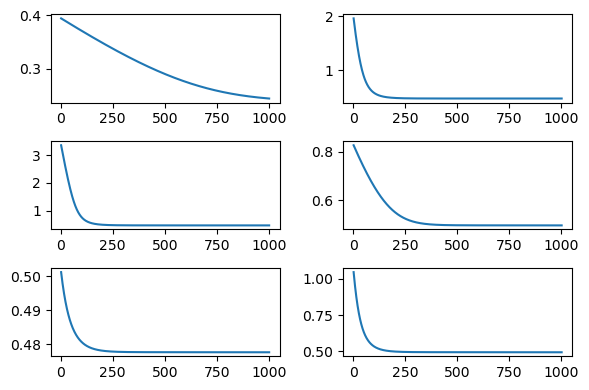

In [10]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, dpi = 100)
k = 0
for i in range(3):
    for j in range(2):
        axes[i][j].plot(np.arange(1, len(losses[k])+1, 1), losses[k])
        k += 1
fig.tight_layout()

In [11]:
pred = []
for i in weights:
    predictions = []
    for elem in predict(x_test, i):
        predictions.append(decision_boundary(elem))
    pred.append(predictions)

In [12]:
# Accuracy
acc = []
for i in range(len(np.unique(y_test))):
    acc.append(accuracy(pred[i],test_labels[i]))
print(f"Testing accuracy using gradient descent: {np.mean(acc)}")

Testing accuracy using gradient descent: 0.8333333333333334


## Scikit-Learn module

In [13]:
# L-BFGS
clf_lbfgs = LogisticRegression(solver="lbfgs").fit(x_train, y_train)
lbfgs_wt = clf_lbfgs.coef_

# Newton-CG
clf_newt = LogisticRegression(solver="newton-cg").fit(x_train, y_train)
newt_wt = clf_newt.coef_

In [14]:
lbfgs_pred = []
for i in lbfgs_wt:
    predictions = []
    for elem in predict(x_test, i):
        predictions.append(decision_boundary(elem))
    lbfgs_pred.append(predictions)

In [15]:
newt_pred = []
for i in newt_wt:
    predictions = []
    for elem in predict(x_test, i):
        predictions.append(decision_boundary(elem))
    newt_pred.append(predictions)

In [16]:
# LBFGS Accuracy
lbfgs_acc = []
for i in range(len(np.unique(y_test))):
    lbfgs_acc.append(accuracy(lbfgs_pred[i],test_labels[i]))
print(f"Testing accuracy using gradient descent: {np.mean(lbfgs_acc)}")

Testing accuracy using gradient descent: 0.6287878787878788


In [17]:
# Newton-CG Accuracy
newt_acc = []
for i in range(len(np.unique(y_test))):
    newt_acc.append(accuracy(newt_pred[i],test_labels[i]))
print(f"Testing accuracy using gradient descent: {np.mean(newt_acc)}")

Testing accuracy using gradient descent: 0.6233766233766235


In [ ]:
# Fin